<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>



# <h1 align="center" id="heading">Phase I - Proof of Concept</h1>



## ☑️ Objectives
At the end of this session, you will have a brief understanding of how to:
- [ ] Find and run pre-trained models (Phase I)
- [ ] Evaluate results from pre-trained models (Phase I)
- [ ] Run a pre-trained model using real Reddit data (Phase I)


## 🛠️ Pre-Assignment
1. Create a virtual environment with 🐍 conda : `conda env create -f environment.yml`

2. Activate your conda virtual environment: `conda activate tsla_bot`

3. Create a .env file in the root directory and add the following variables:
4. 
   `STOCK_API_KEY` : API key from [twelvedata](https://twelvedata.com/pricing)

   `REDDIT_API_CLIENT_ID` : client ID of your reddit app
   
   `REDDIT_API_CLIENT_SECRET`: client secret of your reddit app
   
   Follow this tutorial to generate your own Reddit credentials:
   <https://www.jcchouinard.com/get-reddit-api-credentials-with-praw/>

4. Continue in this notebook



## Background


After the meeting with your boss, and reviewing your [notes](https://www.notion.so/Analyzing-Market-Sentiment-Phase-I-II-and-II-End-to-End-MLOps-with-Open-Source-Tools-dc4b846108b44f6bb2962d550368560c#54cc350bc95041ee873dabde36930af1) 📓, you're ready to get going on a Proof of Concept (POC)

A POC tests the validity of your hypothesis. It's a way to prove that your idea, task, app, or whatever else works!

There's no time to waste - you've got an idea - it's time to get testing it out! 🏁

### Step 1: Initial Imports and Variable Setting 📈

First things first: Let's set some variables that will help us going forward.

Though your boss suggested `"TSLA"`, you can use any active stock-symbol and subreddit!

**IMPORTANT**: Make sure you verify that your selected subreddit exists by navigating to the generated link after you run the following cell

In [1]:
from datetime import datetime, timedelta

### START CODE HERE

# Stock data to grab ex. "TSLA"
symbol = "FORD"

# subreddit to check
subreddit = "Fordstock"

# Time interval granularity
# valid choices are "1week", "1month", "1day"
interval = '1month'

# set the beginning and end of the time range you'd like to analyze

# ensure you use the format "YYYY-MM-DD"
start_date = '2022-02-01'
end_date = '2022-07-30'

### END CODE HERE

start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

print(f'reddit.com/r/{subreddit}')

reddit.com/r/Fordstock


In order to make sure we can import our `BotUtils.py`, we have to ensure we're running from the `TSLASentimentAnalyzer` folder. To do this, we can `cd` into that directory!

In [2]:
cd TSLASentimentAnalyzer


/Users/bm/Desktop/BM/GITHUB/PUBLIC/FourthBrain_dev/Introduction-to-MLOps/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer


### Step 2: Set Environment Variables ⛰️

Use the information you created in the instructions of the `README.md` to fill in the values below!

In [3]:
# define env variables for configuration
import os
# os.environ['REDDIT_API_CLIENT_ID'] = "kh-42LZVKZX3a8Qv4OFfFw"
# os.environ['REDDIT_API_CLIENT_SECRET'] = "KrohrjH4tZfATiRVEl7wNyfGeyxrDw"
# os.environ['STOCK_DATA_API_KEY'] = "cadd0e5ac9c546a8a2458b6f19d52e88"



### Step 3: Get to Scraping 🌐

Now we're going to use the `scraper` module (found in the `TSLASentimentAnalyzer` folder) to "scrape" the subreddit of our choosing for posts!

⚗️ RESOURCES: 

[Web Scraping](https://www.parsehub.com/blog/what-is-web-scraping/)

[Reddit Post Options](https://www.reddit.com/r/help/comments/32eu8w/what_is_the_difference_between_newrising_hot_top/)

##### Initializing the Scraper

In [4]:
import pandas as pd
from loguru import logger
from TSLASentimentAnalyzer.classifier import predict
from TSLASentimentAnalyzer.scraper import RedditScraper
from TSLASentimentAnalyzer.config import settings

# instantiating the reddit scraper
# reddit = ### YOUR LINE OF CODE HERE
reddit = RedditScraper(subreddit)
print(reddit)

##### Helper Functions 🔨

Here are some helper functions to assist in collecting data!

In [5]:
def load_data(number: int, scraping_option: str):
    '''
    loads comments from reddit using the RedditScraper using one of the options
    and returns a DataFrame
    '''
    comments = []
    for submission in scraping_option(number):
        comments.extend(reddit.get_comment_forest(submission.comments))
        logger.debug(
            submission.title,
            submission.num_comments,
            len(reddit.get_comment_forest(submission.comments)),
        )
    df = pd.DataFrame(comments)
    return df


def select_scrap_type(option: str):
    '''
    selects a method from the reddit object based on a given option
    '''
    if option == "Hot":
        return reddit.get_hot
        
    if option == "Rising":
        return reddit.get_rising

    if option == "New":
        return reddit.get_new

##### Loading & Processing the Reddit Comment Data

Let's scrape the 15 🔥 hottest 🔥 posts from your selected subreddit using the `load_data()` helper function!

In [10]:
# Scraping data from reddit
# dfReddit = ### YOUR LINE OF CODE HERE

# API URL : https://www.reddit.com/prefs/apps

dfReddit = load_data(100, select_scrap_type("Hot"))

2022-07-09 18:54:17.597 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x159fbf580>
2022-07-09 18:54:17.599 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x159fbf580>
2022-07-09 18:54:17.599 | DEBUG    | __main__:load_data:9 - Q4.21 Earnings are in.
2022-07-09 18:54:27.717 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a12b610>
2022-07-09 18:54:27.718 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a12b610>
2022-07-09 18:54:27.719 | DEBUG    | __main__:load_data:9 - 2024 Price Target
2022-07-09 18:54:37.868 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a13e880>
2022-07-09 18:54:37.869 | DEBUG    | TSLASentimentAnalyzer.

2022-07-09 18:55:30.173 | DEBUG    | __main__:load_data:9 - ARKK.
2022-07-09 18:55:30.867 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a186df0>
2022-07-09 18:55:30.868 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a186df0>
2022-07-09 18:55:30.869 | DEBUG    | __main__:load_data:9 - Ford s now on $13.82 but guys it would be wise not to panic sell. As they are actually doing alright in terms of car business.
2022-07-09 18:55:32.021 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a191550>
2022-07-09 18:55:32.022 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a191550>
2022-07-09 18:55:32.023 | DEBUG    | __main__:load_data:9 - Ford says the F-150 Lightning is more powerful than it original

2022-07-09 18:55:49.287 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a1e5640>
2022-07-09 18:55:49.289 | DEBUG    | __main__:load_data:9 - Buy
2022-07-09 18:55:50.019 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a1e5460>
2022-07-09 18:55:50.020 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a1e5460>
2022-07-09 18:55:50.021 | DEBUG    | __main__:load_data:9 - Still averaging down. Figure a spike to 20$ a share should get me at least a baby tendie.
2022-07-09 18:55:51.443 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a1fff70>
2022-07-09 18:55:51.444 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a1fff70>
2022-0

2022-07-09 18:56:06.807 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x159f98b20>
2022-07-09 18:56:06.808 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x159f98b20>
2022-07-09 18:56:06.809 | DEBUG    | __main__:load_data:9 - Question for owners of Mustang Mach-e Premium with 70 kWh standard range?
2022-07-09 18:56:07.969 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x159e19cd0>
2022-07-09 18:56:07.970 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x159e19cd0>
2022-07-09 18:56:07.971 | DEBUG    | __main__:load_data:9 - Can Ford Stock Complete a Much-Needed U-Turn? - Schaeffer's Investment Research
2022-07-09 18:56:09.200 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.model

2022-07-09 18:56:26.090 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a2bcb20>
2022-07-09 18:56:26.091 | DEBUG    | __main__:load_data:9 - The Zacks Analyst Blog Highlights: Ford Motor Co., Hewlett Packard Enterprise, Westlake Chemical, Lumen Technologies and DICK'S Sporting Goods — Entrepreneur
2022-07-09 18:56:26.758 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a127b20>
2022-07-09 18:56:26.761 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a127b20>
2022-07-09 18:56:26.764 | DEBUG    | __main__:load_data:9 - Coined Phrase: “Ford better or Ford Worst”. Be in it for the long haul !
2022-07-09 18:56:27.914 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a2bcd60>
2022-07-09 18:56:27.915 |

2022-07-09 18:56:44.075 | DEBUG    | __main__:load_data:9 - 1-20-22 Discussion
2022-07-09 18:56:45.317 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a309e50>
2022-07-09 18:56:45.318 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a309e50>
2022-07-09 18:56:45.320 | DEBUG    | __main__:load_data:9 - Why Ford Stock Is Down Today | The Motley Fool
2022-07-09 18:56:46.204 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a2f6e20>
2022-07-09 18:56:46.206 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x15a2f6e20>
2022-07-09 18:56:46.208 | DEBUG    | __main__:load_data:9 - 1-19-22 discussion￼
2022-07-09 18:56:47.384 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.commen

In [11]:
print(dfReddit.shape)
dfReddit.head()

(719, 5)


,comment,title,id,created_at,score
0,So we're gaining YoY from 2020 to 2021 and fro...,Q4.21 Earnings are in.,hvhdfgs,1643927385,10
1,Lots of added value in positioning. Without in...,Q4.21 Earnings are in.,hvi3eux,1643938234,4
2,Ugh… could pop up in the morning though.,Q4.21 Earnings are in.,hvhbpjv,1643926720,4
3,Going up... F is solid and Profitable... $30+...,Q4.21 Earnings are in.,hvi9q9c,1643941035,4
4,"At least if you have 100 shares for one year, ...",Q4.21 Earnings are in.,hvhecy0,1643927751,6


Once we have our comments, let's use the [`pandas.Series.str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) method to ensure our data will play nicely with our model. (`bert` only supports up to a maximum of 512 tokens, so a range of `0` to `512` seems appropriate)

In [12]:
# slice comments as bert supports only 512 tokens
dfReddit['comment'] = dfReddit['comment'].str.slice(0,512)

In [13]:
dfReddit.head()

,comment,title,id,created_at,score
0,So we're gaining YoY from 2020 to 2021 and fro...,Q4.21 Earnings are in.,hvhdfgs,1643927385,10
1,Lots of added value in positioning. Without in...,Q4.21 Earnings are in.,hvi3eux,1643938234,4
2,Ugh… could pop up in the morning though.,Q4.21 Earnings are in.,hvhbpjv,1643926720,4
3,Going up... F is solid and Profitable... $30+...,Q4.21 Earnings are in.,hvi9q9c,1643941035,4
4,"At least if you have 100 shares for one year, ...",Q4.21 Earnings are in.,hvhecy0,1643927751,6


### Step 5: Analyze the Comments! 🔍


We'll be using the `FourthBrain/bert_model_reddit_tsla` model (found [here](https://huggingface.co/FourthBrain/bert_model_reddit_tsla)), which is based off of the `distilbert-base-uncased` (found [here](https://huggingface.co/distilbert-base-uncased))

We'll use this model in a `sentiment-analysis` pipeline! (read all about that [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.example))

In [14]:
from transformers import pipeline

# initialize the sentiment pipeline
sentiment_pipeline = pipeline('sentiment-analysis', 'FourthBrain/bert_model_reddit_tsla')


reddit_json = sentiment_pipeline(dfReddit["comment"].tolist())

# Retrieve labels and scores
dfReddit['label'] = [reddit_json[i]['label'] for i in range(0, len(reddit_json))]
dfReddit['score'] = [reddit_json[i]['score'] for i in range(0, len(reddit_json))]


2022-07-09 18:57:58.677613: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next up, we'll want to perform the following steps

1. Convert the `created_at` column to the appropriate format and name it `'timestamp'`
2. Normalize the dates using the `NormalizeDates()` helper function

In [15]:
import numpy as np
from BotUtils import NormalizeDates

# Rename timestamp column 
dfReddit = dfReddit.rename(columns={'created_at': 'timestamp'})
dfReddit['timestamp'] = [datetime.fromtimestamp(dt) for dt in dfReddit['timestamp'] ]

# Normalize Reddit sentiment data
dfReddit = NormalizeDates(dfReddit, timestamp_col="timestamp", interval=interval)

# Create a continous time series 
dfTimeSeries = pd.DataFrame(dfReddit["timestamp"])

### Step 6: Get Stock Data 🚀

Next up, we're going to get the stock data and create a DataFrame - as well as normalize the dates, just like we did with the subreddit comment timestamps

In [17]:
from BotUtils import GetStockData
GetStockData(settings.stock_data_api_key, symbol=symbol, start_date=start_date, end_date=end_date, interval='1day')

({'meta': {'symbol': 'FORD',
   'interval': '1day',
   'currency': 'USD',
   'exchange_timezone': 'America/New_York',
   'exchange': 'NASDAQ',
   'mic_code': 'XNCM',
   'type': 'Common Stock'},
  'values': [{'datetime': '2022-07-08',
    'open': '1.53000',
    'high': '1.61000',
    'low': '1.53000',
    'close': '1.55000',
    'volume': '15800'},
   {'datetime': '2022-07-07',
    'open': '1.59000',
    'high': '1.61000',
    'low': '1.53000',
    'close': '1.60000',
    'volume': '14200'},
   {'datetime': '2022-07-06',
    'open': '1.58000',
    'high': '1.62000',
    'low': '1.55000',
    'close': '1.61000',
    'volume': '9900'},
   {'datetime': '2022-07-05',
    'open': '1.59000',
    'high': '1.60000',
    'low': '1.55000',
    'close': '1.59000',
    'volume': '35500'},
   {'datetime': '2022-07-01',
    'open': '1.46000',
    'high': '1.60000',
    'low': '1.43000',
    'close': '1.54000',
    'volume': '15700'},
   {'datetime': '2022-06-30',
    'open': '1.50000',
    'high': '1

In [18]:
from BotUtils import GetStockData

# Get Stock Data
j, dfStockData = GetStockData(settings.stock_data_api_key, symbol=symbol, start_date=start_date, end_date=end_date, interval='1day')
dfStockData = dfStockData[(dfStockData['timestamp'] >= start_date) & (dfStockData['timestamp'] <= end_date)]

# Normalize stock price data
dfStockData = NormalizeDates(dfStockData, timestamp_col="timestamp", interval=interval)

### Step 7: Merge Sentiment and Stock Data 🧬

We've got some processing to do! 

In [19]:
# Join time series df with stock price df and reddit df
dfSentiment = dfTimeSeries.merge(dfStockData, how='left', on="timestamp")
dfSentiment = dfSentiment.merge(dfReddit, how='left', on="timestamp")

# Filter down to only the columns that we'll be using 
dfSentiment = dfSentiment[['timestamp', 'close', 'volume', 'label', 'score']]

# Clean up NaNs for closing price, score, and labels
dfSentiment['close'] = dfSentiment['close'].fillna(0)
dfSentiment['score'] = dfSentiment['score'].fillna(0)
dfSentiment['label'] = dfSentiment['label'].fillna('NEUTRAL')
dfSentiment['label'] = ['NEGATIVE' for s in dfSentiment['label'] == 'LABEL_0']
dfSentiment['label'] = ['POSITIVE' for s in dfSentiment['label'] == 'LABEL_1']

# Convert close from string to float
dfSentiment['close'] = dfSentiment['close'].astype('float')

# Calculate weighted sentiment
dfSentiment['sentiment'] = [1 if sentiment == "POSITIVE"  else 0 if sentiment == "NEUTRAL" else -1 for sentiment in dfSentiment['label'].tolist() ]
dfSentiment['weighted_sentiment'] = dfSentiment['sentiment'] * dfSentiment['score']

# Count only the POSITIVE and NEGATIVE labels (NEUTRAL is just a filler for missing dates)
dfSentiment['counter'] = [1 if sentiment == "POSITIVE"  else 1 if sentiment == "NEGATIVE" else 0 for sentiment in dfSentiment['label'].tolist() ]

# Group by to calculate Reddit post count and sentiment score (mean of weighted sentiment)
dfSentiment = dfSentiment.groupby('timestamp') \
       .agg({'counter':'sum', 'close':'max', 'volume':max, 'weighted_sentiment':'mean'}) \
       .rename(columns={'sentiment':'count_posts', 'weighted_sentiment':'sentiment_score'}) \
       .reset_index()


In [20]:
dfSentiment

,timestamp,counter,close,volume,sentiment_score
0,2022-01-01,33489,0.00,NaN,0.890148
1,2022-02-01,388531,1.74,90500,0.858129
2,2022-03-01,596183,1.75,83500,0.864426
3,2022-04-01,121680,1.92,79700,0.867256
4,2022-05-01,148176,1.63,8700,0.884760
5,2022-06-01,56784,1.62,9600,0.876936
6,2022-07-01,1620,1.61,9900,0.883426


In [32]:
dfSentiment.shape

(6, 10)

### Step 8: Final Computation 🖥️

In this last step, we're going to finish up some calculations:

1. Create the lags and percentage change for the closing stock price. 
2. Calculate the 3 month rolling average.

In [21]:
# Create lags and %change for closing stock price
dfSentiment['close_lag1'] = dfSentiment['close'].shift(1)
dfSentiment['close_lag1'] = dfSentiment['close_lag1'].fillna(0)
dfSentiment['perc_change_close'] = (dfSentiment['close'] - dfSentiment['close_lag1']) / dfSentiment['close_lag1']
dfSentiment['perc_change_close'] = dfSentiment['perc_change_close'].fillna(0)

dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score'].shift(1)
dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score_lag1'].fillna(0)
dfSentiment['perc_change_sentiment'] = (dfSentiment['sentiment_score'] - dfSentiment['sentiment_score_lag1']) / dfSentiment['sentiment_score_lag1']

# Calculate 3 month rolling average
dfSentiment['sentiment_SMA3mo'] = dfSentiment.sentiment_score.rolling(3).mean()
dfSentiment['sentiment_SMA3mo'] = dfSentiment['sentiment_SMA3mo'].fillna(0)

dfSentiment = dfSentiment[1:]
dfSentiment

,timestamp,counter,close,volume,sentiment_score,close_lag1,perc_change_close,sentiment_score_lag1,perc_change_sentiment,sentiment_SMA3mo
1,2022-02-01,388531,1.74,90500,0.858129,0.00,inf,0.890148,-0.035970,0.000000
2,2022-03-01,596183,1.75,83500,0.864426,1.74,0.005747,0.858129,0.007338,0.870901
3,2022-04-01,121680,1.92,79700,0.867256,1.75,0.097143,0.864426,0.003274,0.863270
4,2022-05-01,148176,1.63,8700,0.884760,1.92,-0.151042,0.867256,0.020183,0.872147
5,2022-06-01,56784,1.62,9600,0.876936,1.63,-0.006135,0.884760,-0.008843,0.876317
6,2022-07-01,1620,1.61,9900,0.883426,1.62,-0.006173,0.876936,0.007401,0.881707


Let's save our work in a `.csv` for use later in the Streamlit app!

In [22]:
# Save DataFrame locally (or somewhere else) for use in Streamlit app
dfSentiment.to_csv('./'+subreddit+"_sentiment_data.csv")

In [31]:
ls

Fordstock_sentiment_data.csv  classifier.py
README.md                     config.py
__pycache__/                  scraper.py
app.py                        sentiment_data.csv


### Step 8a: Plotting our Results! 📊

Now, after all that, let's plot our results and see how they shape up!

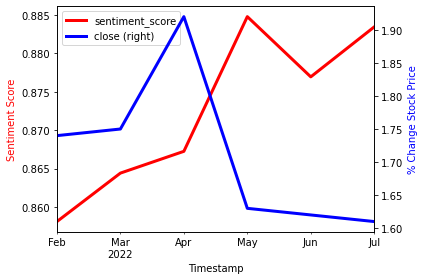

In [23]:
import matplotlib.pyplot as plt

ax1 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                  y = 'sentiment_score', color = 'Red',
                  linewidth = 3)

ax2 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                   y = 'close', secondary_y = True,
                   color = 'Blue',  linewidth = 3,
                   ax = ax1) 

#labeling x and y-axis
ax1.set_xlabel('Timestamp', color = 'black')
ax1.set_ylabel('Sentiment Score', color = "r")
ax2.set_ylabel('% Change Stock Price', color = 'b')
 
#defining display layout
plt.tight_layout()
 
#show plot
plt.show()

In [28]:
ls

Fordstock_sentiment_data.csv  classifier.py
README.md                     config.py
__pycache__/                  scraper.py
app.py                        sentiment_data.csv
